# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("airbnb_NYC.csv", encoding="latin1")
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [ ]:
#1
df["Price"]=df["Price"].str.replace("$","")
df["Price"]=df["Price"].str.replace(",","")
df["Price"] = pd.to_numeric(df["Price"], errors='coerce')
print("Missing values:",df["Price"].isna().sum())

Missing values: 0



Q1 Explanation:

First, I removed the dollar signs "$" because they are not numeric characters.

Next, I removed the commas "," because they would cause a formatting issue for prices over $999.

I converted the strings to numeric values so that algebraic operations can be performed.

After cleaning the "Price" column, I counted the NaN values, of which there were 0.

2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.


In [ ]:
df=pd.read_csv("mn_police_use_of_force.csv")
df.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [ ]:
df["subject_injury"].value_counts(dropna=False)

,count
subject_injury,
NaN,9848
Yes,1631
No,1446


In [ ]:
print("Proportion of missing values",df["subject_injury"].isna().sum() / len(df))


Proportion of missing values 0.7619342359767892


In [ ]:
pd.crosstab(df["subject_injury"], df["force_type"], dropna=False)

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172
NaN,2,7051,1421,0,27,74,87,0,170,31,985


A noticeable pattern is that more commonly used force types have especially high proportions of missing injury data. For example, bodily force, chemical irritant, and taser incidents have 3-8x more missing values than recorded injury outcomes. For the force types maximal restraint technique and less lethal, all entries under subject injury are missing. Some less common force categories have missing values comparable to observed outcomes. Overall, the proportion of missing values for injury varies by force type.

In [ ]:
df["subject_injury"] = df["subject_injury"].fillna("Missing")
df["subject_injury"].value_counts()



,count
subject_injury,
Missing,9848
Yes,1631
No,1446


3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.

In [ ]:
df=pd.read_csv("metabric.csv")
df.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


In [ ]:
df["Overall Survival Status"] = df["Overall Survival Status"].str.split(":").str[1]
df["Overall Survival Status"] = df["Overall Survival Status"].map({
    "DECEASED": 0,
    "LIVING": 1
})

In [ ]:
df["Overall Survival Status"].value_counts(dropna=False)

,count
Overall Survival Status,
0,768
1,575


4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [ ]:
df=pd.read_csv("airbnb_NYC.csv", encoding="latin1")
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [ ]:
print("Missing Values:",df['Review Scores Rating'].isna().sum())

Missing Values: 8323


In [ ]:
median_rating = df["Review Scores Rating"].median()
median_rating

94.0

In [ ]:
df["Review Scores Rating_imputed"] = df["Review Scores Rating"].fillna(median_rating)
df["Review Scores Rating_imputed"].isna().sum()

np.int64(0)

Replacing missing values with the median is problematic because it assumes that listings with missing reviews are similar to those with typical ratings. This reduces variablility in the dataset and may distort relationships between review scores and other variables.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?

In [ ]:
df=pd.read_excel('shark_attack.xls')
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since the dataset is an excel file, pd.read_excel() works.

2. Drop any columns that do not contain data.

In [ ]:
df=df.dropna(axis=1, how='all')

3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.

An observation is a row in the dataset that represents an individual shark attack incident. This affects cleaning because some variables must be treated per incident rather than aggregated. We analyze the data to understand the context of the specific observation.



4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?

In [ ]:
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Year"].min(), df["Year"].max()

(0.0, 2026.0)

In [ ]:
df=df[df["Year"]>=1940]
df["Year"].min(), df["Year"].max()

(1940.0, 2026.0)

Text(0.5, 1.0, 'Number of Shark Attacks Since 1940')

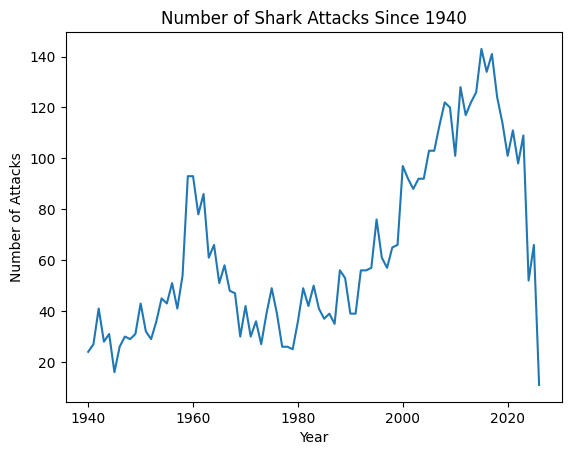

In [ ]:
df.groupby("Year").size().plot()
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.title("Number of Shark Attacks Since 1940")


In [ ]:
df["Year"].value_counts()

,count
Year,
2015.0,143
2017.0,141
2016.0,134
2011.0,128
2014.0,126
...,...
1977.0,26
1979.0,25
1940.0,24


Since 1940, the number of shark attacks have been increasing. There is some variability, with a peak around 1960 before dropping again. Attacks were most prevalent in 2015-2017, and have decreased since then. It appears that there are very few attacks in 2026, but that is because the year just started.

5. Clean the Age variable and make a histogram of the ages of the victims.

In [ ]:
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

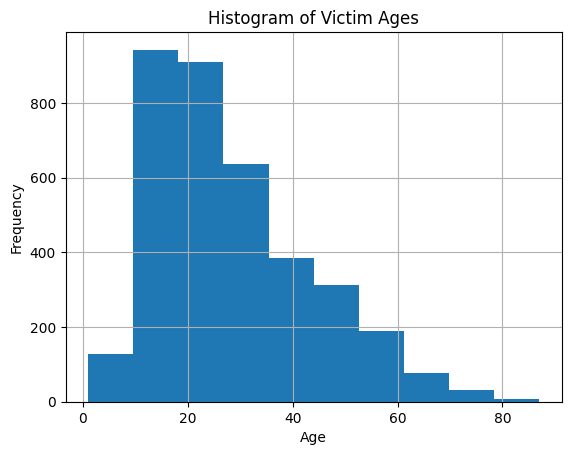

In [ ]:
df["Age"].hist()
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Victim Ages")
plt.show()

6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?

In [ ]:
df["Type"].value_counts(dropna=False)

,count
Type,
Unprovoked,4124
Provoked,521
Invalid,402
Watercraft,280
Sea Disaster,156
Questionable,26
NaN,14
Boat,7
Provoked,2


In [ ]:
df["Type"] = df["Type"].str.strip().str.title()

df["Type"] = df["Type"].replace({
    "Provoked": "Provoked",
    "Unprovoked": "Unprovoked"})

df["Type"] = df["Type"].where(
    df["Type"].isin(["Provoked", "Unprovoked"]),"Unknown")

In [ ]:
df["Type"].value_counts(dropna=False)

,count
Type,
Unprovoked,4125
Unknown,889
Provoked,523


In [ ]:
print("Proportion of unprovoked:",(df["Type"]=="Unprovoked").sum()/len(df))

Proportion of unprovoked: 0.7449882607910421


7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.

In [ ]:
df["Fatal Y/N"].value_counts(dropna=False)

,count
Fatal Y/N,
N,4237
Y,830
NaN,406
UNKNOWN,45
N,7
F,5
M,3
Nq,1
n,1


In [ ]:
df["Fatal Y/N"] = df["Fatal Y/N"].str.strip().str.upper()
df["Fatal Y/N"] = df["Fatal Y/N"].replace({
    "Y": "Y",
    "N": "N"})
df["Fatal Y/N"] = df["Fatal Y/N"].where(df["Fatal Y/N"].isin(["Y", "N"]),"Unknown")

In [ ]:
df["Fatal Y/N"].value_counts(dropna=False)

,count
Fatal Y/N,
N,4245
Y,830
Unknown,462


8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [ ]:
pd.crosstab(df["Type"], df["Fatal Y/N"], normalize="index")

Fatal Y/N,N,Unknown,Y
Type,,,
Provoked,0.957935,0.017208,0.024857
Unknown,0.411699,0.449944,0.138358
Unprovoked,0.818909,0.012848,0.168242


For provoked attacks, 95% of attacks are not fatal. For unprovoked attacks, 81% are not fatal. Overall, shark attacks are more likely to result in injury rather than death, but an attack is even less likely to be fatal for provoked attacks. This could be because when a human initiates contact with a shark, the shark responds in a defensive manner but does not intend to kill the person. However, an unprovoked attack is likely a feeding attempt by the shark.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?

  This paper is about data tidying, an important component of data cleaning. The structure of tidy datasets makes them easier to manipulate and model because each variable is a column and each observation is a row. This paper discusses a simple framework to tidy messy datasets.

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

  The "tidy data standard" is intended to simplify the initial exploration and analysis of the data by giving a standard way to organize the dataset, rather than starting from scratch every time.

  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

  The first quote comes from Leo Tolstoy's quote, "Happy families are all alike; every unhappy family is unhappy in its own way." This relates to data because there are many different ways for a dataset to be messy, but tidy datasets are all identical in structure. This means that there is one right way make a dataset "tidy," and this predictability makes it easier to work with.

  The second quote means that its usually obvious that each row is an observation and each column is a variable in a particular dataset. However, generally speaking, variables and observations are ambiguous. For example, observations can represent a person, a year, a transaction, or many other things, depending on context. Additionally, a variable can be a number, a category, or something derived from other variables. This shows that what counts as an observation or a variable depends on the context of the data and the questions being asked.




  4. Read Section 2.2. How does Wickham define values, variables, and observations?

Wickham defines values as the numbers or strings that make up a dataset, and each value corresponds to both a variable and an observation. A variable contains all the values down a column that measure the same feature, like height or weight. An observation contains all the values belonging to a single row, such as a person, across attributes.

  5. How is "Tidy Data" defined in section 2.3?

"Tidy data" is a dataset in which each variable forms a column, each observation forms a row, and each type of observational unit forms a table.

  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

The five most common problems with messy datasets are that the column headers are values instead of variable names, multiple variables are stored in a single column, variables are stored in rows as well as columns, multiple types of observational units are stored in the same table, or a single observational unit is stored in multiple tables. The data in table 4 are messy beacuase the column headers are values rather than variable names. The solution is melting the dataset, or turning the columns into rows.

  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

  Table 11 is messy because there is a column for each day of the month. Table 12 is "molten" because it has been melted from a wide to long format. This makes the data tidy because the year, month, and day columns have been combined to make one date column. Therefore, each row represents the meteorological values of a single day.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.


In [ ]:
df=pd.read_csv("ForeignGifts_edu.csv")
df.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.


In [ ]:
df["Foreign Gift Amount"].describe()

,Foreign Gift Amount
count,2.822100e+04
mean,5.882327e+05
std,3.222011e+06
min,-5.377700e+05
25%,5.700000e+03
50%,9.461500e+04
75%,3.761420e+05
max,1.000000e+08


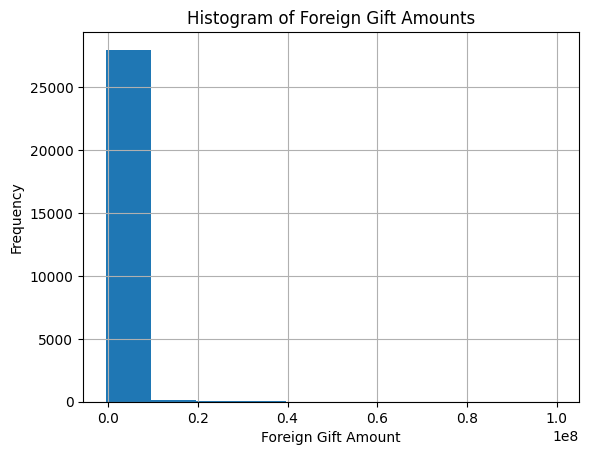

In [ ]:
df["Foreign Gift Amount"].hist(bins=10)
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Frequency")
plt.title("Histogram of Foreign Gift Amounts")
plt.show()

Based on the histogram, the foreign gift amounts are heavily skewed to the right. The middle 50% of gifts range from about 50,000 dollars to 350,000 dollars, with the median around 95,000 dollars. Nearly all of these fall into the bins ranging from 0.0 to 0.15e8. However, since there are some extreme outliers, such as the max amount at 100 million dollars, the mean is skewed to almost 600,000 dollars and the x axis of the histogram is very extended.

3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?


In [ ]:
df["Gift Type"].value_counts(dropna=False)/len(df)

,count
Gift Type,
Contract,0.612097
Monetary Gift,0.387513
Real Estate,0.000390


61.2% of gifts are contracts, 37.8% of gifts are monetary, and 0.04% of gifts are real estate.

4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?


In [ ]:
# Top 15 countries in terms of number of gifts:
df.groupby("Country of Giftor").size().sort_values(ascending=False).head(15)

,0
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [ ]:
# Top 15 countries in terms of amount given:
df.groupby("Country of Giftor")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.


In [ ]:
#  Top 15 institutions in terms of total amount of received money:
df.groupby("Institution Name").sum()["Foreign Gift Amount"].sort_values(ascending=False).head(15)

,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


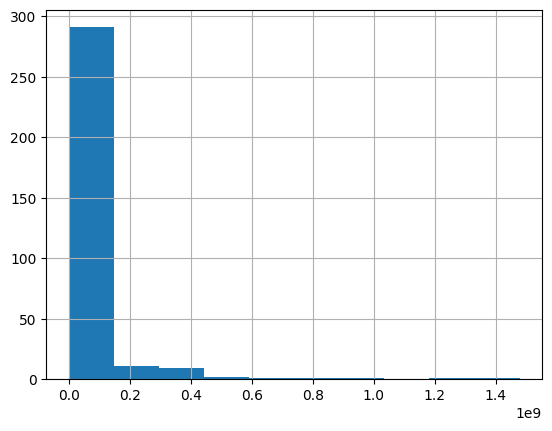

In [ ]:
df.groupby("Institution Name").sum()["Foreign Gift Amount"].hist(bins=10)
plt.show()

6. Which giftors provide the most money, in total?

In [ ]:
# Top 15 giftors that provide the most money:
df.groupby("Giftor Name").sum()["Foreign Gift Amount"].sort_values(ascending=False).head(15)

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


Giftors from Qatar, specifically the Qatar Foundation, gift the most money.

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.


In [ ]:
df=pd.read_csv("college_completion.csv")


2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.


In [ ]:
df.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [ ]:
df.shape

(3798, 63)

There are 3798 observations and 63 variables in the dataset.

3. Cross tabulate `control` and `level`. Describe the patterns you see in words.


In [ ]:
pd.crosstab(df["control"], df["level"],margins=True, margins_name="Total")

level,2-year,4-year,Total
control,,,
Private for-profit,465,527,992
Private not-for-profit,68,1180,1248
Public,926,632,1558
Total,1459,2339,3798


In [ ]:
print(2339/3798)
print(1180/1248)

0.6158504476040021
0.9455128205128205


Several patterns emerge from the crosstab. Overall, about 60% of institutions are 4-year rather than 2-year. Public institutions are the most common type of control, but a larger proportion of public institutions are 2-year rather than 4-year. In contrast, most 4-year institutions are private not-for-profit. Among private not-for-profit institutions, approximately 95% are 4-year schools.

4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?


In [ ]:
df["grad_100_value"].describe()

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


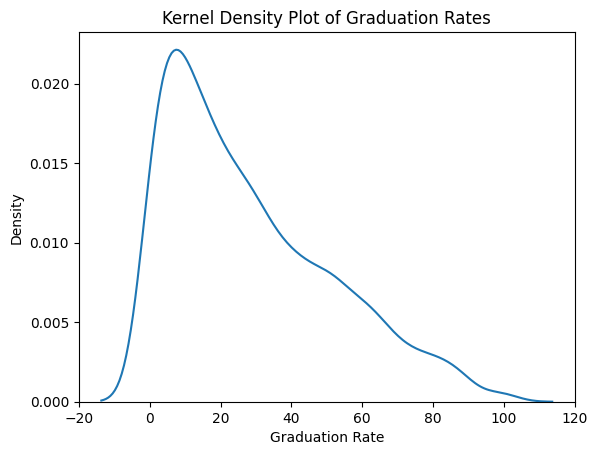

In [ ]:
sns.kdeplot(data=df, x="grad_100_value")
plt.xlabel("Graduation Rate")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Graduation Rates")
plt.show()

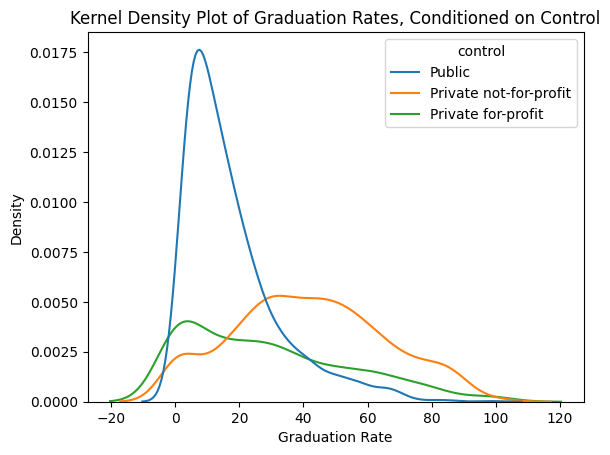

In [ ]:
sns.kdeplot(data=df, x="grad_100_value", hue="control")
plt.xlabel("Graduation Rate")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Graduation Rates, Conditioned on Control")
plt.show()

In [ ]:
df.groupby("control")["grad_100_value"].describe()

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


Private not-for-profit institutions appear to have the most favorable graduation rates, with a mean graduation rate of 41.7%.

5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

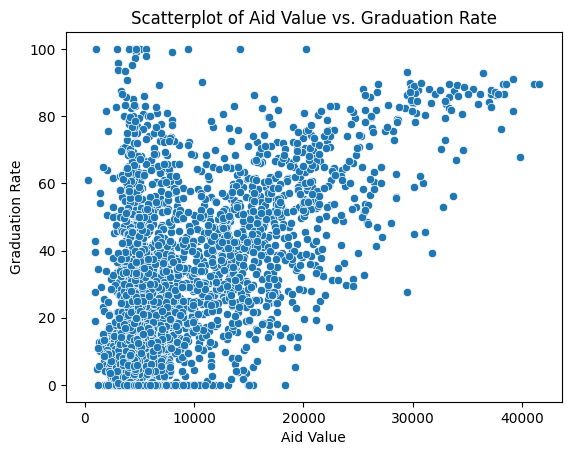

In [ ]:
sns.scatterplot(data=df, x="aid_value", y="grad_100_value")
plt.xlabel("Aid Value")
plt.ylabel("Graduation Rate")
plt.title("Scatterplot of Aid Value vs. Graduation Rate")
plt.show()

In [ ]:
cov=df["aid_value"].cov(df["grad_100_value"])
print('Covariance:',cov)

Covariance: 88610.48316902434


In [ ]:
corr=df["aid_value"].corr(df["grad_100_value"])
print('Correlation:',corr)

Correlation: 0.5758792845936073


The positive covariance indicates that aid value and graduation rate move in the same direction. The correlation of 0.576 shows a moderate positive relationship between the two variables, suggesting that institutions with higher aid values tend to have higher graduation rates, although this does not imply causation.

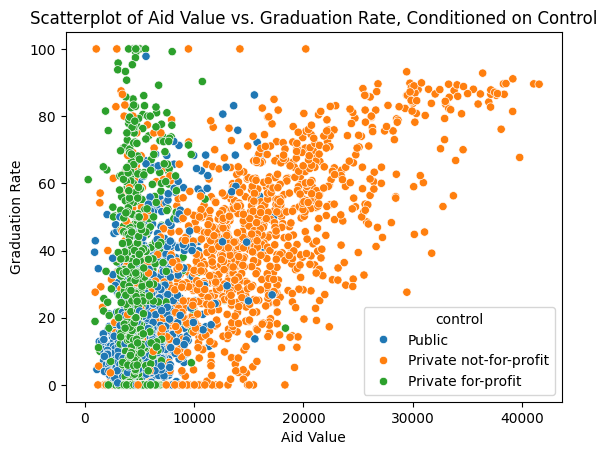

In [ ]:
sns.scatterplot(data=df, x="aid_value", y="grad_100_value", hue="control")
plt.xlabel("Aid Value")
plt.ylabel("Graduation Rate")
plt.title("Scatterplot of Aid Value vs. Graduation Rate, Conditioned on Control")
plt.show()

In [ ]:
cov=df.groupby("control")["aid_value"].cov(df['grad_100_value'])
cov

,aid_value
control,
Private for-profit,6897.524957
Private not-for-profit,109274.123337
Public,15355.146212


In [ ]:
corr=df.groupby("control")["aid_value"].corr(df['grad_100_value'])
corr

,aid_value
control,
Private for-profit,0.188363
Private not-for-profit,0.601591
Public,0.482481


When grouping by control, we see that aid varies most positively with graduation rates among private not-for-profit institutions, with a correlation of 0.6. Private for-profit institutions have the weakest correlation. Based on the scatterplot, we see that these for-profit schools offer the least financial aid.

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**answers to question 6 are in github repo under question_6

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `ames_prices.csv` data with Pandas.


In [ ]:
df=pd.read_csv("ames_prices.csv")
df.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?


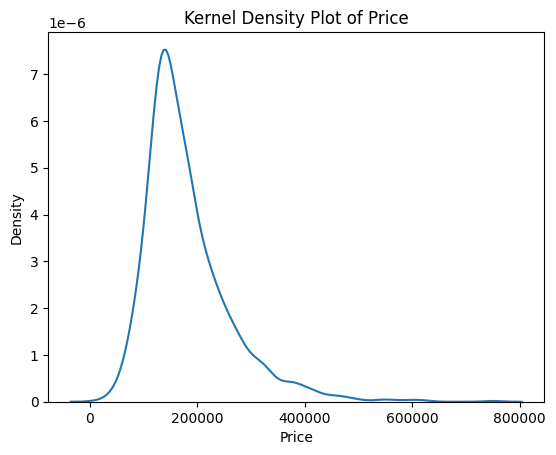

In [ ]:
sns.kdeplot(data=df, x="price")
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Price")
plt.show()

In [ ]:
df['price'].describe()

,price
count,2930.000000
mean,180796.060068
std,79886.692357
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,755000.000000


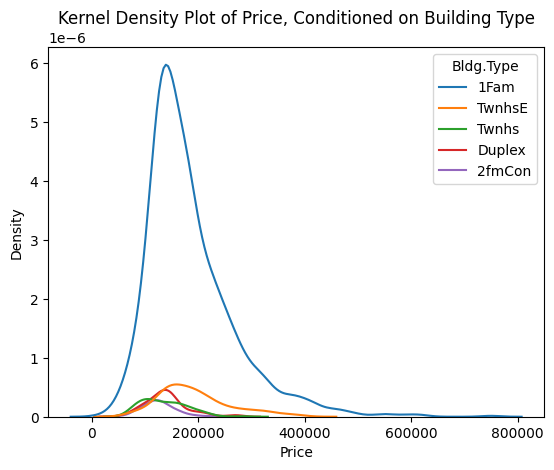

In [ ]:
sns.kdeplot(data=df, x="price", hue="Bldg.Type")
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Price, Conditioned on Building Type")
plt.show()

In [ ]:
df.groupby("Bldg.Type")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,184812.041237,82821.802329,12789.0,130000.0,165000.0,220000.0,755000.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,192311.914163,66191.738021,71000.0,145000.0,180000.0,222000.0,392500.0


On average, the most expensive building type is an end-of-unit townhome, followed by a single family home. The building type with the highest variance in transaction prices is a single family home.

3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).


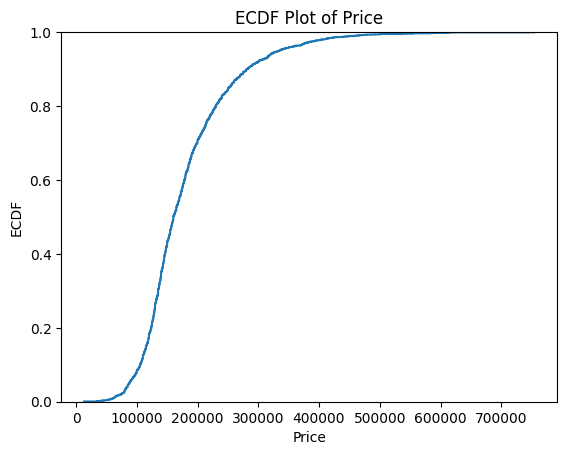

In [ ]:
sns.ecdfplot(data=df, x="price")
plt.xlabel("Price")
plt.ylabel("ECDF")
plt.title("ECDF Plot of Price")
plt.show()

In [ ]:
min = df["price"].min()
q25 = df["price"].quantile(0.25)
q50 = df["price"].median()
q75 = df["price"].quantile(0.75)
max = df["price"].max()

print("5-number summary:")
print(f"Min: {Q1}, 25%: {Q2}, Median: {Q3}, 75%: {Q4}, Max: {Q5}")

5-number summary:
Min: 12789, 25%: 129500.0, Median: 160000.0, 75%: 213500.0, Max: 755000


4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?


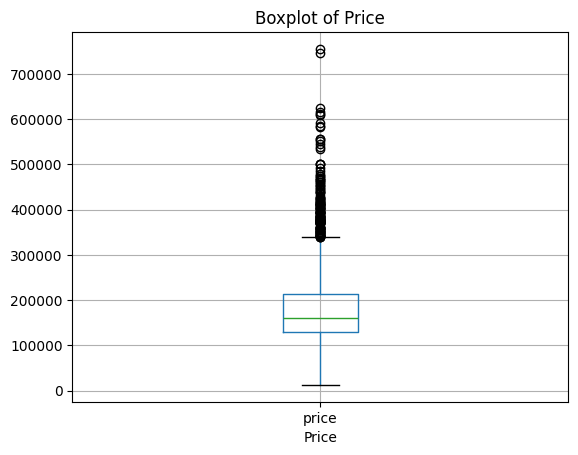

In [ ]:
df.boxplot(column="price")
plt.xlabel("Price")
plt.title("Boxplot of Price")
plt.show()

There is a high concentration of outliers on the upper end of the distrubution, with 2 extreme outliers at the maximum.

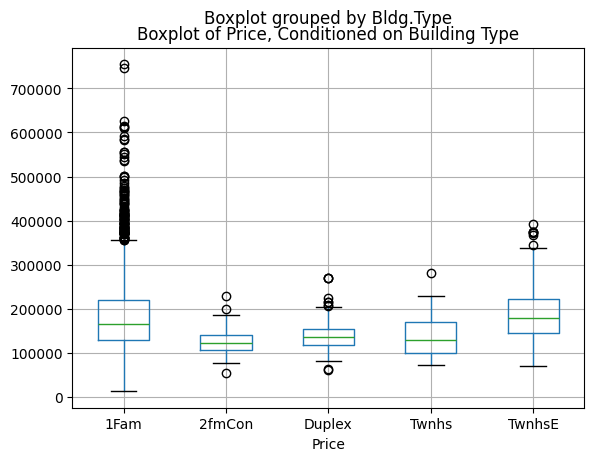

In [ ]:
df.boxplot(column="price", by="Bldg.Type")
plt.xlabel("Price")
plt.title("Boxplot of Price, Conditioned on Building Type")
plt.show()

We see that many of the outliers, including the maximum, are in the single family home category. The single family homes have the widest spread by far, followed by the end-of-townhouse units.

5. Make a dummy variable indicating that an observation is an outlier.


In [ ]:
iqr = q75 - q25
upper_whisker = q75 + 1.5 * iqr
lower_whisker = q25 - 1.5 * iqr

df['price_is_outlier'] = ( (df['price'] < lower_whisker) |
(df['price'] > upper_whisker) ).astype(int)



6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [ ]:
df['price_winsorize'] = ( (df['price'] < lower_whisker) * lower_whisker
+ (df['price'] > upper_whisker) * upper_whisker
+ (df['price'] >= lower_whisker) * (df['price'] <= upper_whisker) * df['price'])

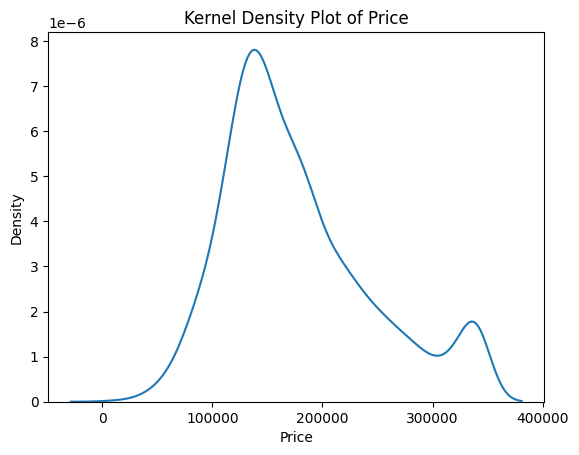

In [ ]:
sns.kdeplot(data=df, x="price_winsorize")
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Price")
plt.show()

In [ ]:
df[['price', 'price_winsorize']].describe().loc[
    ['min', '25%', '50%', '75%', 'max']
]


,price,price_winsorize
min,12789.0,12789.0
25%,129500.0,129500.0
50%,160000.0,160000.0
75%,213500.0,213500.0
max,755000.0,339500.0


The results change because the lower bound outliers have been replaced with the value of the lower whisker, and upper bound outliers have been replaced with the value of the upper whisker. This is especially noticeable for the extreme upper bound outliers, for the kde plot no longer has an extreme right skew.